## Exploring EDA 
### Predictors: Median_Income, Poverty_Pct, Unemploted_Pct
### Outcome: Obesity_Pct

Hypothesis: Socioeconomic disadvantage is the most impactful driver of obesity prevalence, with poverty being the strongest socioeconomic predictor of obesity.

#### Load in Data

In [15]:
import pandas as pd

df = pd.read_csv("merged_health_census_clean.csv")

print(df.shape)     
df.head()


(27151, 44)


,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Tract_FIPS_full,Health_Pop,Obesity_Pct,Obesity_Count,Diabetes_Pct,...,Median_Income,Poverty_Pct,Poverty_Count,HS_Grad_Pct,HS_Grad_Count,Bachelors_Pct,Bachelors_Count,Unemployed_Pct,Unemployed_Count,Median_Age
0,CA,Los Angeles,644000,6037206032,0644000-06037206032,6037206032,5275,29.5,1556.0,15.5,...,26094.0,487.733333,1829,180.000000,675,82.400000,309,49.333333,185,29.5
1,CA,Pasadena,656000,6037462001,0656000-06037462001,6037462001,3974,32.0,1272.0,11.6,...,40192.0,358.712121,947,179.924242,475,139.015152,367,63.257576,167,29.4
2,CA,Fullerton,628000,6059011504,0628000-06059011504,6059011504,5473,18.7,1023.0,4.6,...,31793.0,400.000000,1740,51.724138,225,200.689655,873,87.126437,379,22.8
3,TX,Longview,4843888,48183000401,4843888-48183000401,48183000401,3371,33.9,1143.0,9.2,...,52846.0,178.039216,454,249.803922,637,78.823529,201,48.235294,123,34.0
4,WI,Madison,5548000,55025002200,5548000-55025002200,55025002200,4254,29.5,1255.0,8.7,...,42621.0,232.701422,491,247.867299,523,281.516588,594,160.663507,339,42.1


#### Sanity Check
Make sure outcomes & predictors are valid

In [16]:
predictors = ["Median_Income", "Poverty_Pct", "Unemployed_Pct"]
outcome = "Obesity_Pct"

#Summary Stats
df[predictors + [outcome]].describe()

#Check Missing Values
df[predictors + [outcome]].isna().sum()

#Check Ranges
for col in predictors + [outcome]:
    print(col, "min:", df[col].min(), "max:", df[col].max())


Median_Income min: -666666666.0 max: 250001.0
Poverty_Pct min: 0.0 max: 2523.728813559322
Unemployed_Pct min: 0.0 max: 728.5714285714286
Obesity_Pct min: 9.1 max: 57.5


#### Cleaning

In [17]:
import numpy as np

#1. Fix Median_Income 
# Replace -666666666 with NaN, drop or keep only positive values
df["Median_Income"] = df["Median_Income"].replace(-666666666, np.nan)
df = df[df["Median_Income"] > 0]


***Median_Income***
  - Replaced Census placeholder values (`-666666666`) with `NaN`.
  - Dropped any non-positive values.


### Distributions for Variables

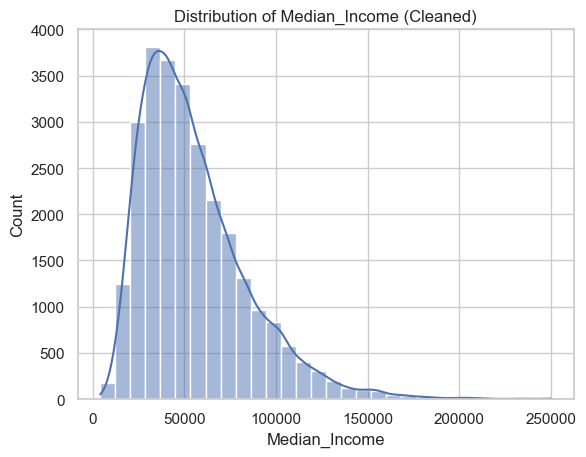

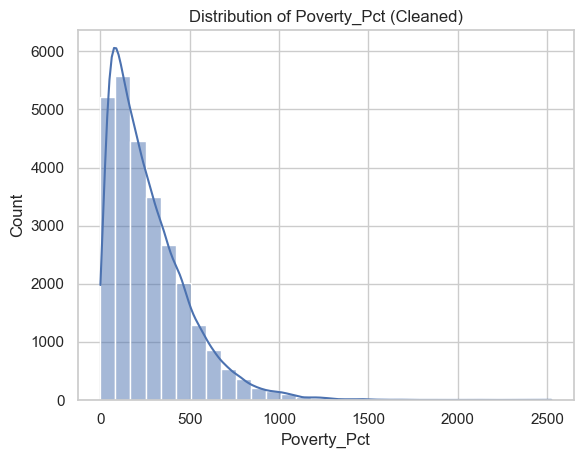

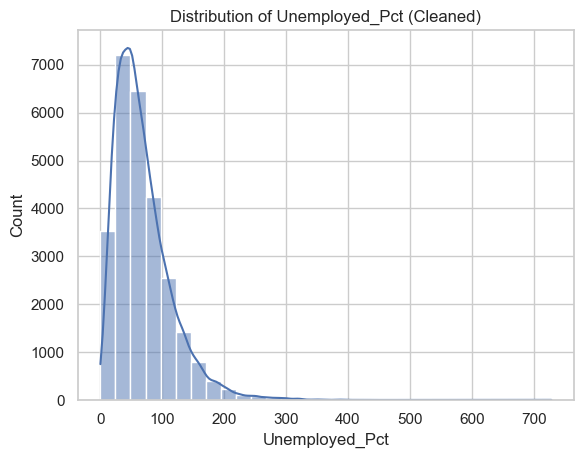

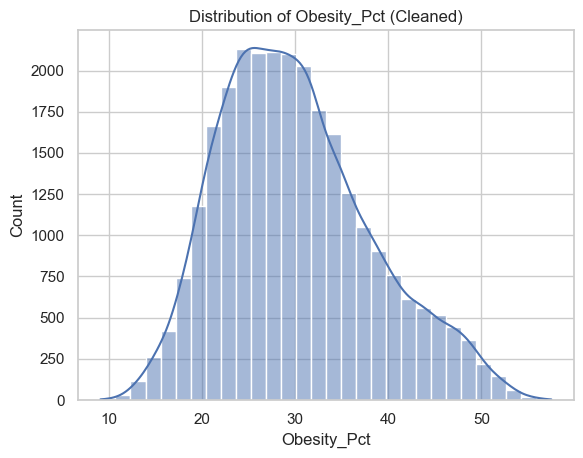

['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID', 'Tract_FIPS_full', 'Health_Pop', 'Obesity_Pct', 'Obesity_Count', 'Diabetes_Pct', 'Diabetes_Count', 'HighChol_Pct', 'HighChol_Count', 'HighBP_Pct', 'HighBP_Count', 'Stroke_Pct', 'Stroke_Count', 'Sleep_Pct', 'Sleep_Count', 'MentalHealth_Pct', 'MentalHealth_Count', 'Asthma_Pct', 'Asthma_Count', 'HeartDisease_Pct', 'HeartDisease_Count', 'Smoking_Pct', 'Smoking_Count', 'State_FIPS', 'County_FIPS', 'Tract_FIPS', 'State_Name', 'County_Name', 'Tract_Name', 'Census_Pop', 'Median_Income', 'Poverty_Pct', 'Poverty_Count', 'HS_Grad_Pct', 'HS_Grad_Count', 'Bachelors_Pct', 'Bachelors_Count', 'Unemployed_Pct', 'Unemployed_Count', 'Median_Age']


['Unemployed_Pct', 'Unemployed_Count']

In [19]:
for col in ["Median_Income","Poverty_Pct","Unemployed_Pct","Obesity_Pct"]:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Cleaned)")
    plt.show()

# Show all column names
print(df.columns.tolist())

# Look for anything with "Labor", "Work", "Force" in the name
[c for c in df.columns if any(keyword in c.lower() for keyword in ["labor", "work", "force", "employ"])]


** Observations of Dists **

Median_Income:

- Now ranges from ~20k to 250k.

- Right-skewed, with most tracts concentrated between 30k–70k.

- Matches real-world income patterns.

Poverty_Pct:

- Now mostly 0–100, though a few tracts still extend past 100 (likely very small denominators).

- Highly skewed right, meaning most tracts have lower poverty but a tail of very high-poverty areas.

Unemployed_Pct:

- Mostly 0–100 but with a long tail toward higher values.

- Distribution suggests unemployment is being calculated relative to total population rather than labor force, so values look higher than official rates. Still valid as a stress indicator.

Obesity_Pct:

- Clean, bell-shaped distribution centered near 30%.

- Looks consistent with national health statistics.

### Pairwise Relationships

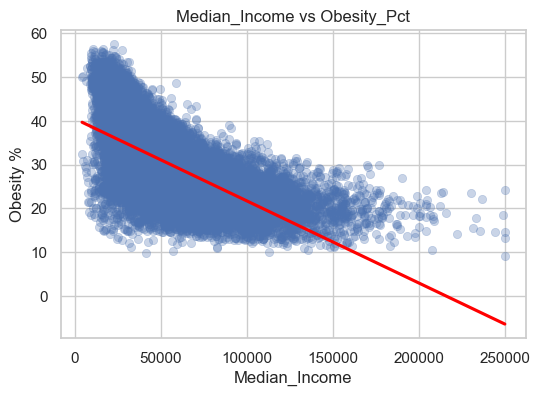

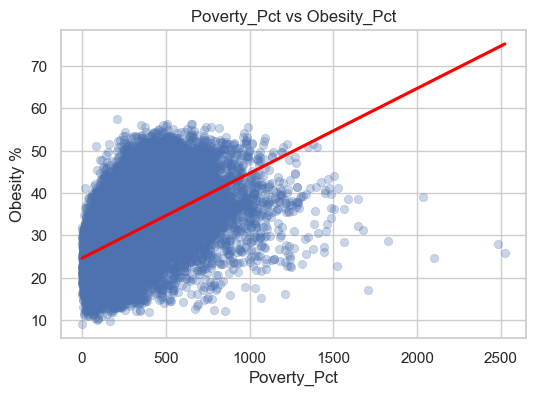

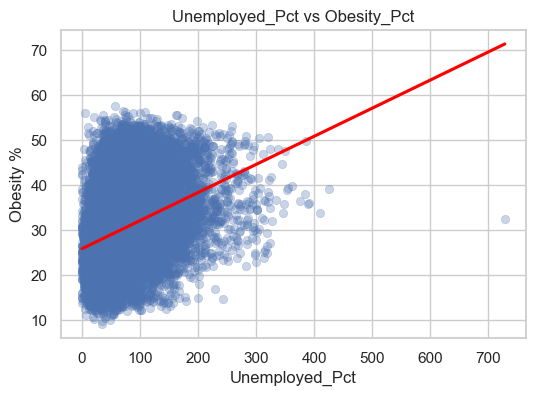

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define predictors and outcome
predictors = ["Median_Income", "Poverty_Pct", "Unemployed_Pct"]
outcome = "Obesity_Pct"

# Loop through each predictor
for col in predictors:
    plt.figure(figsize=(6,4))
    
    sns.scatterplot(
        data=df, x=col, y=outcome,
        alpha=0.3, edgecolor=None
    )
    
    # Add a simple regression line (optional)
    sns.regplot(
        data=df, x=col, y=outcome,
        scatter=False, ci=None, line_kws={'color':'red'}
    )
    
    plt.title(f"{col} vs {outcome}")
    plt.xlabel(col)
    plt.ylabel("Obesity %")
    plt.show()


#### Observation 

[Median Income Vs Obesity]
- Obesity prevalence is highest when income is low (~< $50k)
- Interpretation: People in wealthier areas tend to have lower obesity rates.

[Poverty % vs Obesity]
- Clear positive relationship/ Poverty Rate Incr so does Obesity 
- Lots of pointsin low poverty but upward slop 

[Unemployment % vs Obesity]
- Postive Relationship --> Higher unemployment % = Higher obesity 
- Not as steep as poverty's porb because this isnt perctange based off of labor
- Interpretation: Economic stress from unemployment is correlated with worse health outcomes (here, obesity).

### Group Comparsion

C:\Users\rsaqu\AppData\Local\Temp\ipykernel_37384\318721186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Income_Quartile", y="Obesity_Pct", palette="Set2")


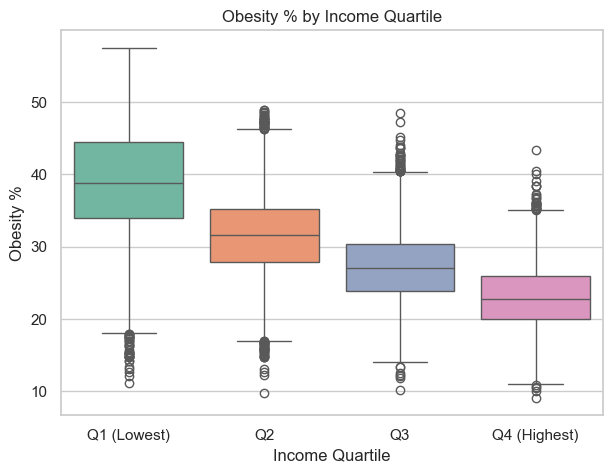

C:\Users\rsaqu\AppData\Local\Temp\ipykernel_37384\318721186.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Poverty_Quartile", y="Obesity_Pct", palette="Set3")


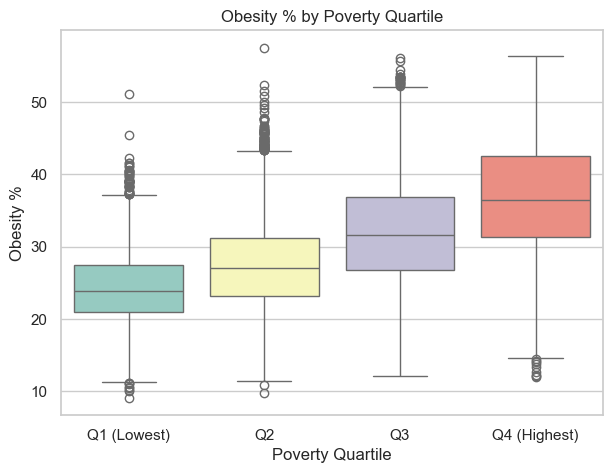

C:\Users\rsaqu\AppData\Local\Temp\ipykernel_37384\318721186.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Unemployment_Quartile", y="Obesity_Pct", palette="coolwarm")


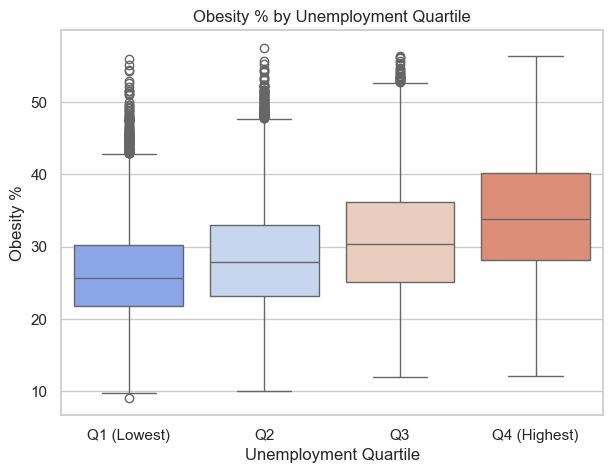

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Quartiles for Median Income
df["Income_Quartile"] = pd.qcut(df["Median_Income"], q=4, labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"])

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Income_Quartile", y="Obesity_Pct", palette="Set2")
plt.title("Obesity % by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("Obesity %")
plt.show()

# Quartiles for Poverty
df["Poverty_Quartile"] = pd.qcut(df["Poverty_Pct"], q=4, labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"])

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Poverty_Quartile", y="Obesity_Pct", palette="Set3")
plt.title("Obesity % by Poverty Quartile")
plt.xlabel("Poverty Quartile")
plt.ylabel("Obesity %")
plt.show()

# Quartiles for Unemployment
df["Unemployment_Quartile"] = pd.qcut(df["Unemployed_Pct"], q=4, labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"])

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Unemployment_Quartile", y="Obesity_Pct", palette="coolwarm")
plt.title("Obesity % by Unemployment Quartile")
plt.xlabel("Unemployment Quartile")
plt.ylabel("Obesity %")
plt.show()

### Income Quartiles vs Obesity

- Pattern: Obesity rates are highest in the lowest income quartile (Q1) with a median around ~38–40%.

- As income increases, obesity steadily decreases — in the highest income quartile (Q4), the median is closer to ~22–23%.

- Interpretation: Communities with higher income consistently have lower obesity prevalence.

### Poverty Quartiles vs Obesity

- Obesity is lowest in the lowest poverty quartile (Q1), with a median around ~25%.

- As poverty increases, obesity rises steadily, reaching ~38–40% in the highest quartile (Q4).
- Spread is wider in higher-poverty groups, suggesting more variability in outcomes.

- Interpretation: Higher poverty levels are strongly associated with higher obesity prevalence.

### Unemployment Quartiles vs Obesiuty

- Pattern: Obesity rates rise gradually across unemployment quartiles.
- Q1 (lowest unemployment) has a median obesity ~26%, while Q4 (highest unemployment) is ~34–35%.
- The increase is not as steep as poverty’s effect but is still consistent.
- Interpretation: Higher unemployment is linked to worse obesity outcomes, though the relationship is somewhat weaker than income or poverty.


## Multiple Linear Regression

In [ ]:
import statsmodels.api as sm

# Define predictors and outcome
X = df[["Median_Income", "Poverty_Pct", "Unemployed_Pct"]]
y = df["Obesity_Pct"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())

r

                            OLS Regression Results                            
Dep. Variable:            Obesity_Pct   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     7813.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:34:15   Log-Likelihood:                -87012.
No. Observations:               27078   AIC:                         1.740e+05
Df Residuals:                   27074   BIC:                         1.741e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             36.4304      0.143    253.

### Observations

#### R^2
- R² = 0.464 → About 46% of the variation in obesity prevalence is explained by median income, poverty %, and unemployment % together.
- This is a moderately strong fit for social/health data (where outcomes are usually influenced by many factors).
- 3 socioeconomic predictors explains nearly half the variance, that’s actually pretty strong evidence in this context.

#### Median_Income
- For every $10,000 increase in income, obesity prevalence decreases by about 2 percentage points.
- Strong negative effect → higher income areas have lower obesity.

#### Poverty_Pct
- For each 1% increase in poverty rate, obesity prevalence increases by 0.006 percentage points.
- Positive effect → poverty is associated with higher obesity.

#### Unemployed_Pcy
- For each 1% increase in unemployment rate, obesity prevalence increases by 0.008 percentage points.
- Positive effect but smaller magnitude compared to poverty.


## Coefficient Plot
Shows which predictor matters most, in what direction (positive/negative), and with what uncertainty.

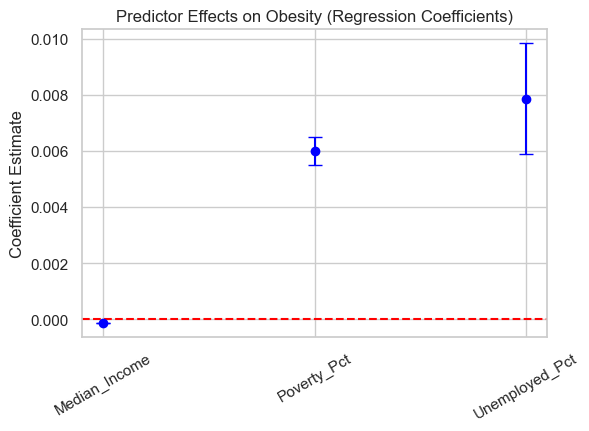

In [ ]:
import matplotlib.pyplot as plt

coef = model.params[1:]
errors = model.bse[1:]

plt.figure(figsize=(6,4))
plt.errorbar(coef.index, coef.values, yerr=1.96*errors.values, 
             fmt='o', color='blue', capsize=5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Predictor Effects on Obesity (Regression Coefficients)")
plt.ylabel("Coefficient Estimate")
plt.xticks(rotation=30)
plt.show()


This coefficient plot summarizes the results of the multiple linear regression model predicting obesity percentage from Median Income, Poverty Rate, and Unemployment Rate.

The red dashed line marks zero effect.

The blue dots represent the estimated coefficients for each predictor.

The error bars show 95% confidence intervals, which reflect uncertainty around the estimates.

The plot shows that Median Income has a negative effect on obesity (higher incomes are linked to lower obesity), while Poverty Rate and Unemployment Rate both have positive effects, meaning higher poverty and unemployment are associated with higher obesity. Among these, Poverty Rate has the strongest and most stable relationship, while Unemployment Rate is positive but less precise.

## Predicted vs Actual Plot
How well your model fits the data, Helps communicate what R^2 means visually

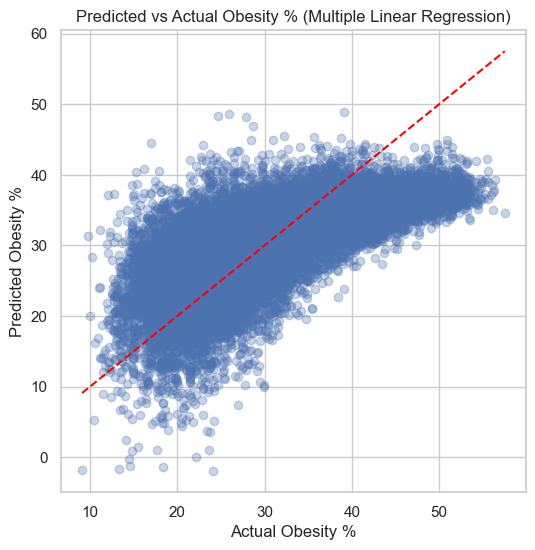

In [30]:
import matplotlib.pyplot as plt

# Get predictions from the model
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Obesity %")
plt.ylabel("Predicted Obesity %")
plt.title("Predicted vs Actual Obesity % (Multiple Linear Regression)")
plt.show()


- The red dashed line represents perfect prediction, where actual = predicted.  
- Most data points cluster around this line, showing that the model captures a meaningful relationship between socioeconomic variables (income, poverty, unemployment) and obesity.  
- However, there is noticeable spread around the line, meaning that while the model explains part of the variation in obesity (R² ≈ 0.46), other unmeasured factors also play an important role.  
- Outliers below or above the line indicate regions where the model underestimates or overestimates obesity rates.  

**moderate predictive power**: it successfully identifies broad patterns but cannot account for all variation in obesity outcomes.

## Decision Tree

Tree R² (in-sample): 0.54
Tree RMSE (in-sample): 5.572


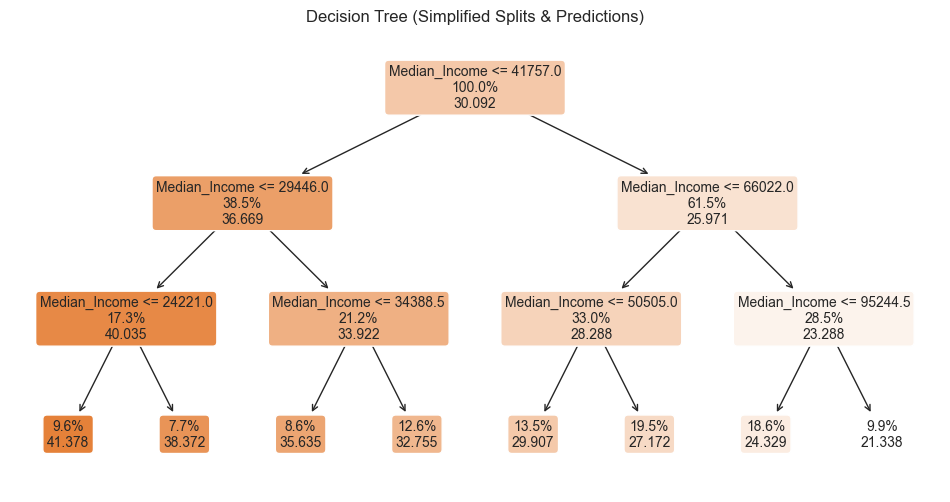

|--- Median_Income <= 41757.00
|   |--- Median_Income <= 29446.00
|   |   |--- Median_Income <= 24221.00
|   |   |   |--- value: [41.38]
|   |   |--- Median_Income >  24221.00
|   |   |   |--- value: [38.37]
|   |--- Median_Income >  29446.00
|   |   |--- Median_Income <= 34388.50
|   |   |   |--- value: [35.63]
|   |   |--- Median_Income >  34388.50
|   |   |   |--- value: [32.76]
|--- Median_Income >  41757.00
|   |--- Median_Income <= 66022.00
|   |   |--- Median_Income <= 50505.00
|   |   |   |--- value: [29.91]
|   |   |--- Median_Income >  50505.00
|   |   |   |--- value: [27.17]
|   |--- Median_Income >  66022.00
|   |   |--- Median_Income <= 95244.50
|   |   |   |--- value: [24.33]
|   |   |--- Median_Income >  95244.50
|   |   |   |--- value: [21.34]



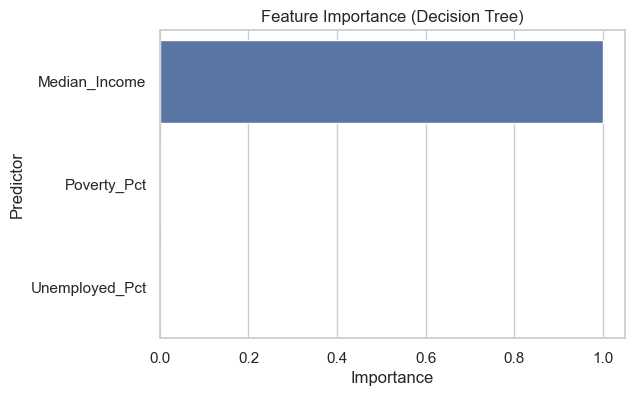

In [32]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# --------- Fit a compact, interpretable tree ----------
X = df[["Median_Income", "Poverty_Pct", "Unemployed_Pct"]]
y = df["Obesity_Pct"]

# Keep it small and readable; choose ONE of these:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
# tree = DecisionTreeRegressor(max_leaf_nodes=6, random_state=42)  # alternative

tree.fit(X, y)

# Evaluate (optional, for context)
y_pred_tree = tree.predict(X)
print("Tree R² (in-sample):", round(r2_score(y, y_pred_tree), 3))
print("Tree RMSE (in-sample):", round(mean_squared_error(y, y_pred_tree, squared=False), 3))

# --------- Visualization 1: Simplified tree ----------
plt.figure(figsize=(12, 6))
plot_tree(
    tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=False,   # hide MSE
    label="none",     # hide samples/values labels
    proportion=True   # proportional node bars (cleaner)
)
plt.title("Decision Tree (Simplified Splits & Predictions)")
plt.show()

# (Optional) Text rules if you want a super-readable summary in console:
print(export_text(tree, feature_names=list(X.columns)))

# --------- Visualization 2: Feature importance ----------
plt.figure(figsize=(6, 4))
sns.barplot(x=tree.feature_importances_, y=X.columns)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Predictor")
plt.show()



Explaining Nodes: Split rule → Only include tracts where Median_Income ≤ 24,221., Percent of data → 17.3% of all rows in your dataset ended up here., Prediction → The average Obesity % for those rows is 40.0%.

Key finding: The tree consistently split on Median_Income only, ignoring Poverty_Pct and Unemployed_Pct.

- This suggests multicollinearity: income, poverty, and unemployment are closely related, so the tree simplified by relying on income as the strongest single predictor.
- The decision tree highlights the dominant role of income in explaining obesity patterns, but regression analysis (earlier) showed that poverty has the strongest independent effect when overlaps are controlled for.

### Key Findings
Socioeconomic disadvantage predicts obesity: Areas with lower income, higher poverty, and higher unemployment had higher obesity prevalence.

Regression results: All three predictors were significant (R² ≈ 0.46), with poverty the strongest independent factor.

Decision tree results: Explained slightly more variance (R² ≈ 0.54, RMSE ≈ 5.57), but relied almost entirely on income, showing predictor overlap.

Overall: Socioeconomic factors explain a substantial share of obesity variation, with poverty emerging as the most stable and influential predictor.